In [1]:
from matplotlib import pyplot as plt
import csv
import numpy as np
import pandas as pd
from collections import Counter

# 1. Simple Plots

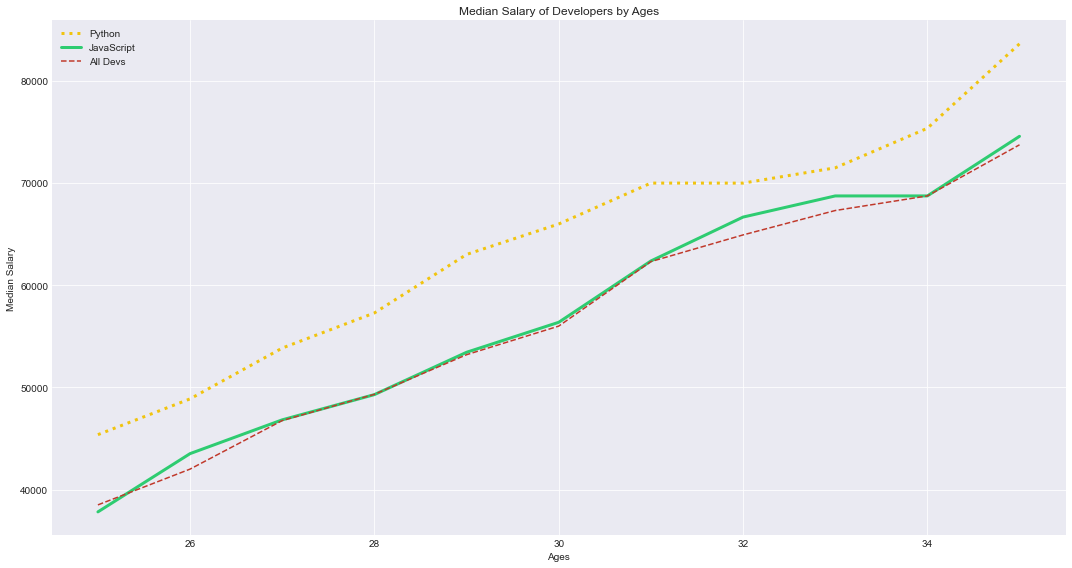

In [2]:
# Median Developer Salaries by Age
ages_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

dev_y = [38496, 42000, 46752, 49320, 53200,
         56000, 62316, 64928, 67317, 68748, 73752]


plt.figure(figsize=(15,8))

plt.style.use('seaborn-darkgrid')

# Median Python Developer Salaries by Age

py_dev_y = [45372, 48876, 53850, 57287, 63016,
            65998, 70003, 70000, 71496, 75370, 83640]

plt.plot(ages_x,py_dev_y,color='#F1C40F',linestyle=':',linewidth=3,label='Python')

# Median JavaScript Developer Salaries by Age
js_dev_y = [37810, 43515, 46823, 49293, 53437,
            56373, 62375, 66674, 68745, 68746, 74583]
plt.plot(ages_x,js_dev_y, color='#2ECC71',linewidth=3, label='JavaScript')


plt.plot(ages_x,dev_y,color='#C0392B',linestyle='--',label = 'All Devs')
plt.xlabel('Ages')
plt.ylabel('Median Salary')
plt.title("Median Salary of Developers by Ages")
plt.legend()
#plt.grid(True)
plt.tight_layout()  #for padding

plt.savefig('plot.png')
plt.show()

# 2. Bar Charts

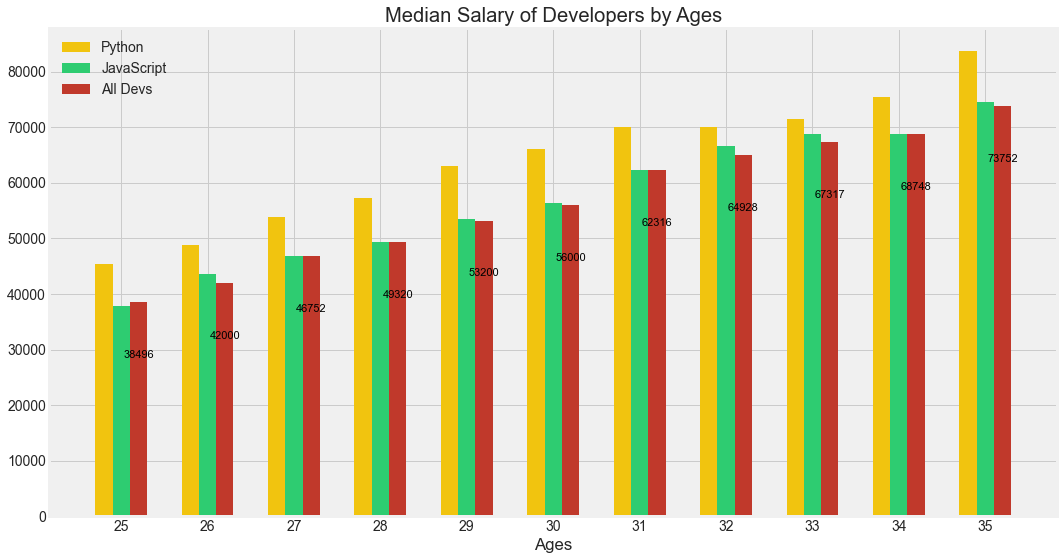

In [3]:
# Median Developer Salaries by Age
ages_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

x_indexes = np.arange(len(ages_x))   #X axis index for Bar chart
width = 0.2

dev_y = [38496, 42000, 46752, 49320, 53200,
         56000, 62316, 64928, 67317, 68748, 73752]


plt.figure(figsize=(15,8))
plt.style.use('fivethirtyeight')


# Median Python Developer Salaries by Age
py_dev_y = [45372, 48876, 53850, 57287, 63016,
            65998, 70003, 70000, 71496, 75370, 83640]
plt.bar(x_indexes-width, py_dev_y, width=width, color='#F1C40F', label='Python')


# Median JavaScript Developer Salaries by Age
js_dev_y = [37810, 43515, 46823, 49293, 53437,
            56373, 62375, 66674, 68745, 68746, 74583]
plt.bar(x_indexes, js_dev_y, width=width, color='#2ECC71', label='JavaScript')



bars = plt.bar(x_indexes+width, dev_y, width=width, color='#C0392B', label = 'All Devs')

#Details in the plot
plt.xticks(ticks=x_indexes, labels=ages_x)

plt.xlabel('Ages')
#plt.ylabel('Median Salary')
#directly labelling Y axis for All Devs
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height()-10000, str(int(bar.get_height())), 
                 ha='center', color='k', fontsize=11)
plt.title("Median Salary of Developers by Ages")
plt.legend()
#plt.grid(True)
plt.tight_layout()  #for padding
plt.savefig('plot.png')
plt.show()

# 3. Horizontol Bar Chart and CSV File Reading

In [4]:
import requests
url = 'https://raw.githubusercontent.com/CoreyMSchafer/code_snippets/master/Python/Matplotlib/02-BarCharts/data.csv'
res = requests.get(url, allow_redirects=True)

with open('data.csv','wb') as file:
    file.write(res.content)
    my_data = pd.read_csv('data.csv')
    
my_data.to_csv('data1.csv')

In [5]:
with open('data1.csv') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    language_counter = Counter()
    for row in csv_reader:
        language_counter.update(row['LanguagesWorkedWith'].split(';'))
        
        
#print(language_counter.most_common(15))  #top 15 most common lang.
lang = list(language_counter.most_common(15))
languages, popularity = zip(*lang)  #zip function to split as two lists
languages = list(languages)
popularity = list(popularity)
#print(languages)
#print(popularity)

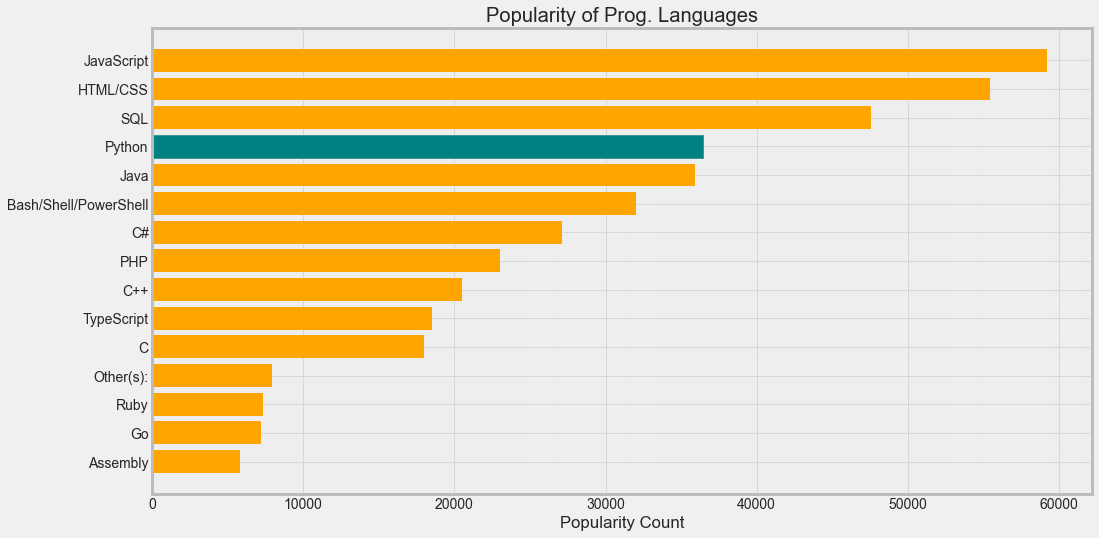

In [6]:
plt.figure(figsize=(15,8))
plt.style.use('bmh')

languages.reverse()
popularity.reverse()
bars = plt.barh(languages, popularity, align='center', color='orange')
bars[-4].set_color('teal')

#plt.ylabel('Programming Languages')

plt.xlabel('Popularity Count')
plt.title("Popularity of Prog. Languages")
plt.show()

# 4. Increase Data-ink

In [7]:
#    1. To show/not show ticks on the axes and axes labels
#plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

#    2. Remove the frame of the chart
#for spine in plt.gca().spines.values():
#    spine.set_visible(False)

#   OR 
#plt.box(False)

#    2.1 to remove axis labels
# plt.gca().axes.get_yaxis().set_visible(False)

#    3. Colouring specific Bars   (Applied to Horizontal Bar Chart Above Section 3)
#bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
# make one bar, the python bar, a contrasting color
#bars[0].set_color('#1F77B4')

#    4. Direct label each bar with Y axis values   (Applied to Vertical Bar Chart in section 2)
#for bar in bars:
#    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())) + '%', 
#                 ha='center', color='w', fontsize=11)

# 5. Pie Charts

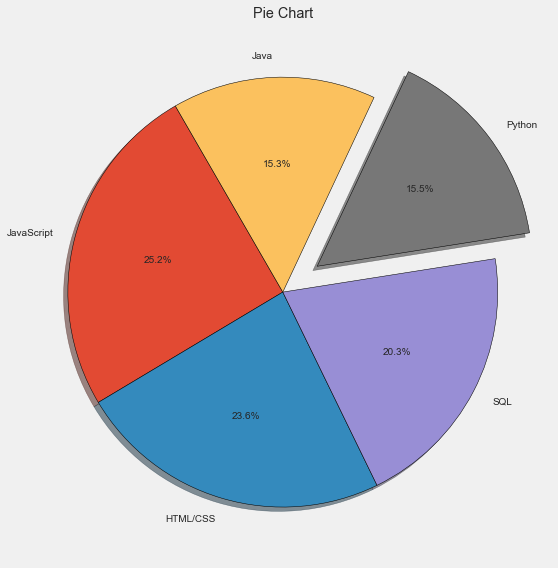

In [8]:
# Colors:
# Blue = #008fd5
# Red = #fc4f30
# Yellow = #e5ae37
# Green = #6d904f

from matplotlib import pyplot as plt

plt.figure(figsize=(15,8))
plt.style.use('ggplot')

# Language Popularity
slices = [59219, 55466, 47544, 36443, 35917]
labels = ['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java']
explode = [0,0,0,0.2,0]  # to focus/emphasize on one particular lang.

plt.pie(slices, labels=labels, wedgeprops = {'edgecolor':'black'},
        autopct = '%1.1f%%',
        startangle=120,
        shadow=True,
        explode = explode)



plt.title("Pie Chart")
plt.tight_layout()
plt.show()

# 6. Stack Plots

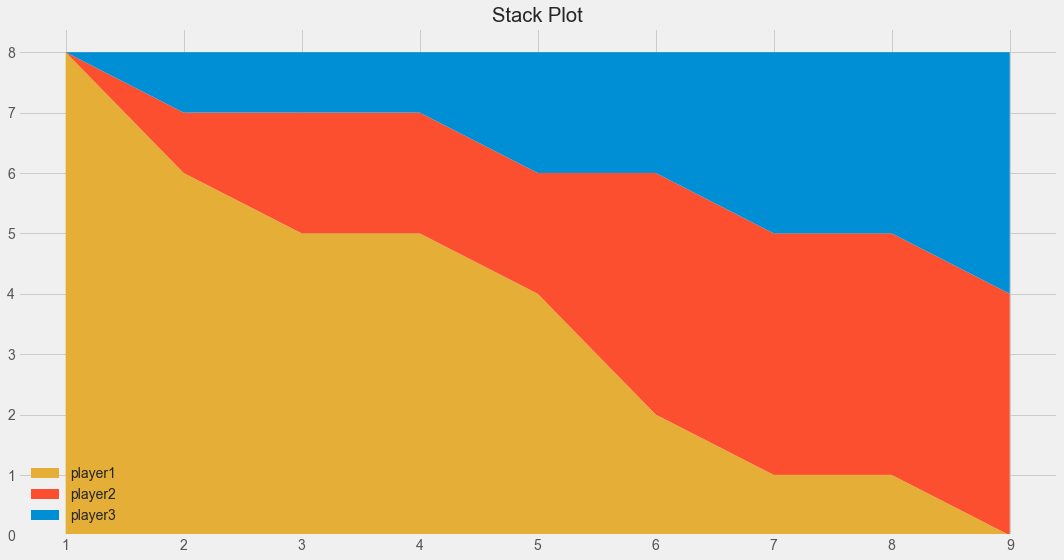

In [9]:
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,8))

minutes = [1, 2, 3, 4, 5, 6, 7, 8, 9]

player1 = [8, 6, 5, 5, 4, 2, 1, 1, 0]
player2 = [0, 1, 2, 2, 2, 4, 4, 4, 4]
player3 = [0, 1, 1, 1, 2, 2, 3, 3, 4]

labels = ['player1', 'player2', 'player3']
colors = ['#e5ae37', '#fc4f30', '#008fd5']

plt.stackplot(minutes, player1, player2, player3, labels=labels, colors=colors)

plt.legend(loc='lower left')




plt.title("Stack Plot")
plt.tight_layout()
plt.show()

# Colors:
# Blue = #008fd5
# Red = #fc4f30
# Yellow = #e5ae37
# Green = #6d904f

# 7. FillArea (LIne Plots)

In [10]:
import requests
url = 'https://raw.githubusercontent.com/CoreyMSchafer/code_snippets/master/Python/Matplotlib/05-Fill_Betweens/data.csv'
res = requests.get(url, allow_redirects=True)

with open('data2.csv','wb') as file:
    file.write(res.content)
    #my_data1 = pd.read_csv('data2.csv', header=None, delim_whitespace=True)
df = pd.read_csv('data2.csv')

In [11]:
df.head()

,Age,All_Devs,Python,JavaScript
0,18,17784,20046,16446
1,19,16500,17100,16791
2,20,18012,20000,18942
3,21,20628,24744,21780
4,22,25206,30500,25704


In [12]:
df.median()

Age              36.5
All_Devs      77616.0
Python        84016.0
JavaScript    78754.0
dtype: float64

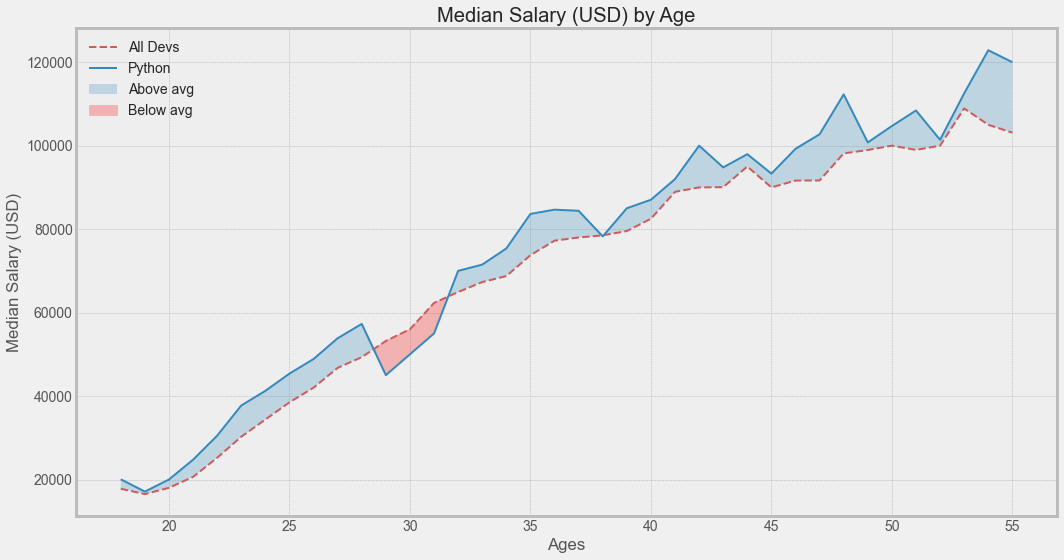

In [13]:
ages = df['Age']
dev_salaries = df['All_Devs']
py_salaries = df['Python']
js_salaries = df['JavaScript']


plt.figure(figsize=(15,8))
plt.style.use('bmh')
plt.plot(ages, dev_salaries, color='#CD5C5C',
         linestyle='--', label='All Devs')

plt.plot(ages, py_salaries, label='Python')

overall_median = 84016

#plt.fill_between(ages, py_salaries,
#                 overall_median,   # y2 param. = median value 
#                 where=(py_salaries > overall_median),  #specific conditions to be met
#                 interpolate=True,
#                 alpha=0.25) 

#plt.fill_between(ages, py_salaries,
#                 overall_median,   # y2 param. = median value 
#                 where=(py_salaries <= overall_median),  #specific conditions to be met
#                 interpolate=True,
#                 color ='red',
#                 alpha=0.25)
plt.fill_between(ages, py_salaries,
                 dev_salaries,
                 where=(py_salaries > dev_salaries),  #specific conditions to be met
                 interpolate=True,
                 label = 'Above avg',
                 alpha=0.25) 

plt.fill_between(ages, py_salaries,
                 dev_salaries,
                 where=(py_salaries <= dev_salaries),  #specific conditions to be met
                 interpolate=True,
                 color ='red',
                 label = 'Below avg',
                 alpha=0.25)




plt.legend()

plt.title('Median Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')

plt.tight_layout()

plt.show()

# 8. Histograms

In [14]:
import requests
url = 'https://raw.githubusercontent.com/CoreyMSchafer/code_snippets/master/Python/Matplotlib/06-Histograms/data.csv'
res = requests.get(url, allow_redirects=True)
with open('data3.csv','wb') as file:
    file.write(res.content)
    #my_data1 = pd.read_csv('data2.csv', header=None, delim_whitespace=True)
df = pd.read_csv('data3.csv')

In [15]:
df.head()

,Responder_id,Age
0,1,14
1,2,19
2,3,28
3,4,22
4,5,30


In [16]:
df.median()

Responder_id    44435.5
Age                29.0
dtype: float64

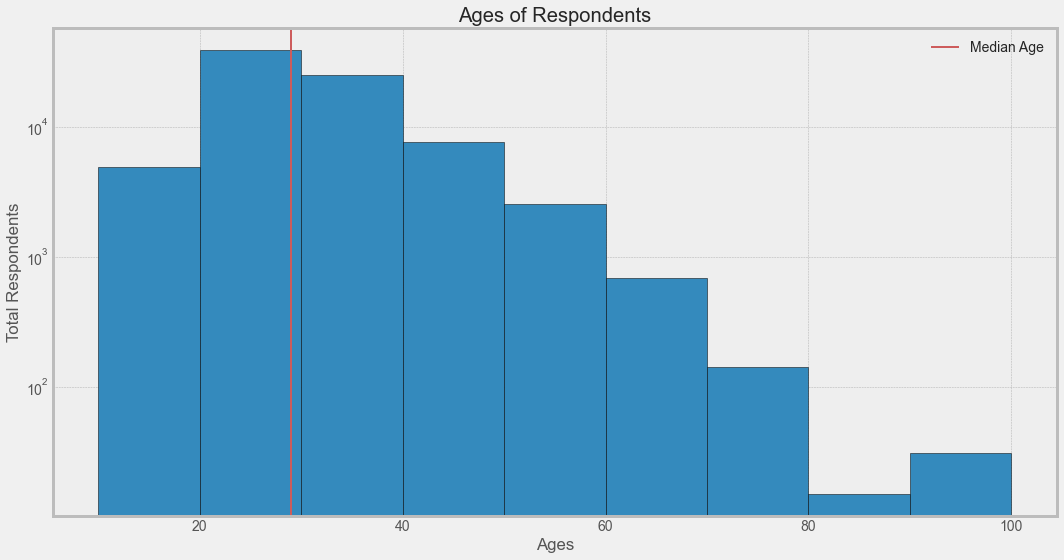

In [17]:
plt.style.use('bmh')
plt.figure(figsize=(15,8))

ids = df['Responder_id']
ages = df['Age']
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

plt.hist(ages, bins=bins, edgecolor='black', log=True)

median_age = 29
color = '#CD5C5C'

plt.axvline(median_age, color = color, label = 'Median Age', linewidth = 2)


plt.legend()
plt.title('Ages of Respondents')
plt.xlabel('Ages')
plt.ylabel('Total Respondents')

plt.tight_layout()

plt.show()

# 9. Scatter Plots

In [18]:
import requests
url = 'https://raw.githubusercontent.com/CoreyMSchafer/code_snippets/master/Python/Matplotlib/07-ScatterPlots/2019-05-31-data.csv'
res = requests.get(url, allow_redirects=True)
with open('data4.csv','wb') as file:
    file.write(res.content)
    #my_data1 = pd.read_csv('data2.csv', header=None, delim_whitespace=True)
df = pd.read_csv('data4.csv')

In [19]:
df

,view_count,likes,ratio
0,8036001,324742,96.91
1,9378067,562589,98.19
2,2182066,273650,99.38
3,6525864,94698,96.25
4,9481284,582481,97.22
...,...,...,...
195,1069693,3970,90.66
196,590760,70454,99.18
197,319347,1208,92.50
198,27594927,1351963,96.40


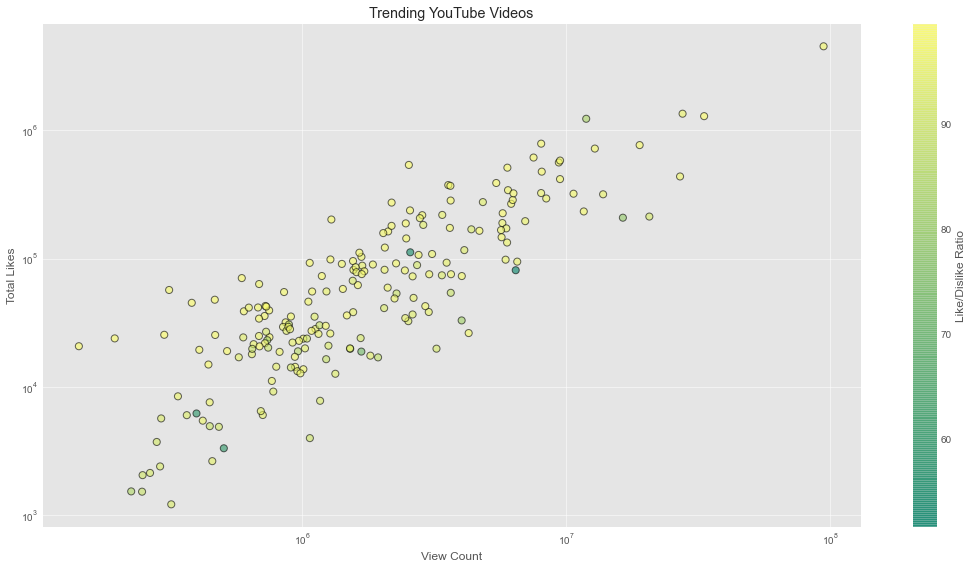

In [20]:
plt.style.use('ggplot')
plt.figure(figsize=(15,8))

view_count = df['view_count']
likes = df['likes']
ratio = df['ratio']

plt.scatter( view_count, likes,
            s=50,
            c=ratio , cmap = 'summer',
            edgecolor='black', linewidth=1, alpha=0.6 )

cbar = plt.colorbar()
cbar.set_label('Like/Dislike Ratio')

plt.xscale('log')
plt.yscale('log')


plt.title('Trending YouTube Videos')
plt.xlabel('View Count')
plt.ylabel('Total Likes')

plt.tight_layout()

plt.show()

# 10. Time Series Data

In [21]:
import requests
url = 'https://raw.githubusercontent.com/CoreyMSchafer/code_snippets/master/Python/Matplotlib/08-TimeSeries/data.csv'
res = requests.get(url, allow_redirects=True)
with open('data5.csv','wb') as file:
    file.write(res.content)
    #my_data1 = pd.read_csv('data2.csv', header=None, delim_whitespace=True)
df = pd.read_csv('data5.csv')

In [22]:
df2 = pd.read_csv('data5.csv')
df2

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-18,7266.080078,8281.660156,7257.259766,8193.139648,8193.139648,723011166
1,2019-05-19,8193.139648,8193.139648,7591.850098,7998.290039,7998.290039,637617163
2,2019-05-20,7998.290039,8102.319824,7807.770020,7947.930176,7947.930176,357803946
3,2019-05-21,7947.930176,8033.759766,7533.660156,7626.890137,7626.890137,424501866
4,2019-05-22,7626.890137,7971.259766,7478.740234,7876.500000,7876.500000,386766321
5,2019-05-23,7876.500000,8165.450195,7801.569824,7996.399902,7996.399902,413162746
6,2019-05-24,7996.399902,8140.819824,7948.680176,8059.129883,8059.129883,179206342
7,2019-05-25,8059.129883,8779.000000,7894.529785,8726.230469,8726.230469,483663699
8,2019-05-26,8726.230469,8931.530273,8668.459961,8785.169922,8785.169922,507164714
9,2019-05-27,8785.169922,8818.709961,8562.200195,8718.849609,8718.849609,360752199


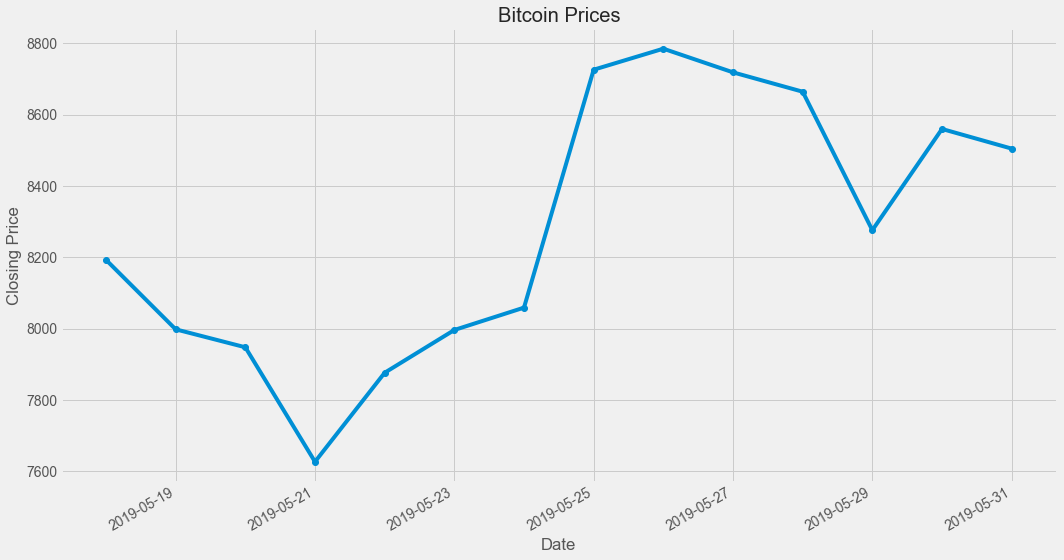

In [25]:
plt.figure(figsize=(15,8))
plt.style.use('fivethirtyeight')

df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

price_date = df['Date']
price_close = df['Close']

plt.plot_date( price_date, price_close, linestyle='solid' )


plt.gcf().autofmt_xdate()

plt.title('Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')


plt.tight_layout()
plt.show()

# 11. Live-Data Plotting

<IPython.core.display.Javascript object>


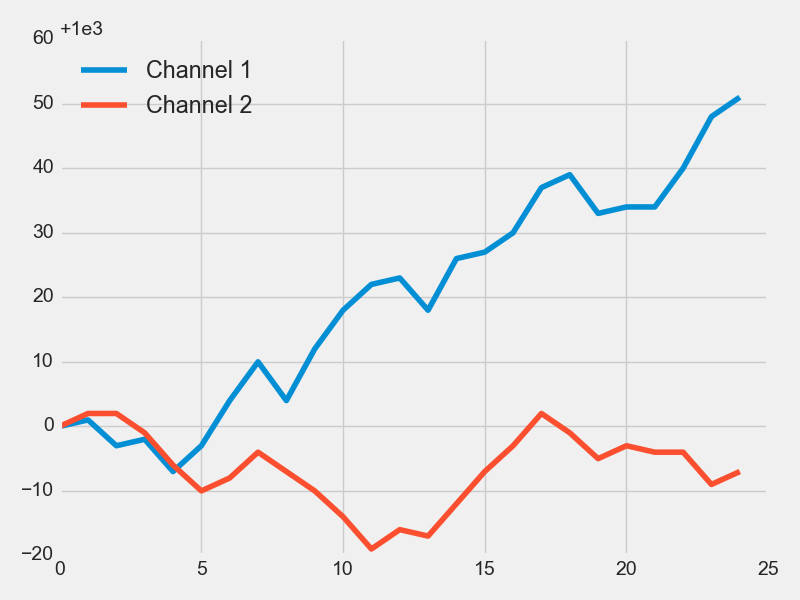

In [36]:
%matplotlib notebook   
# To set backend to notebook backend so that graph display live data instead of a static img
import random
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


plt.style.use('fivethirtyeight')
#plt.figure(figsize=(12,6))

x_vals = []
y_vals = []

index = count()


def animate(i):
    data = pd.read_csv('data6.csv')
    x = data['x_value']
    y1 = data['total_1']
    y2 = data['total_2']

    plt.cla()

    plt.plot(x, y1, label='Channel 1')
    plt.plot(x, y2, label='Channel 2')

    plt.legend(loc='upper left')
    plt.tight_layout()


ani = FuncAnimation(plt.gcf(), animate, interval=1000)

plt.tight_layout()
plt.show()

# 12. Subplots

In [29]:
import requests
url = 'https://raw.githubusercontent.com/CoreyMSchafer/code_snippets/master/Python/Matplotlib/10-Subplots/data.csv'
res = requests.get(url, allow_redirects=True)
with open('data7.csv','wb') as file:
    file.write(res.content)
    #my_data1 = pd.read_csv('data2.csv', header=None, delim_whitespace=True)
df = pd.read_csv('data7.csv')

In [30]:
df.head()

,Age,All_Devs,Python,JavaScript
0,18,17784,20046,16446
1,19,16500,17100,16791
2,20,18012,20000,18942
3,21,20628,24744,21780
4,22,25206,30500,25704


<IPython.core.display.Javascript object>


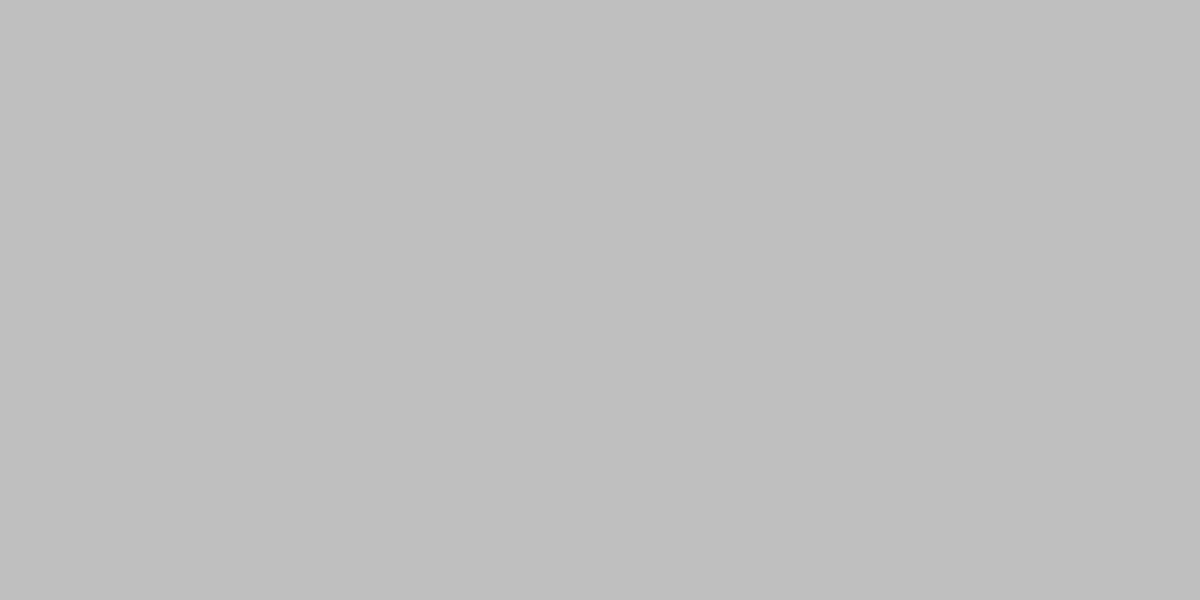

<IPython.core.display.Javascript object>


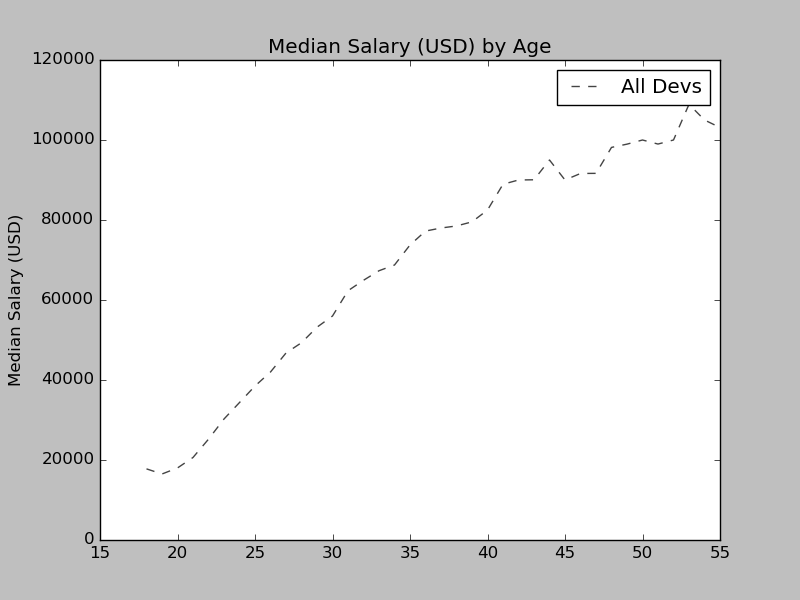

<IPython.core.display.Javascript object>


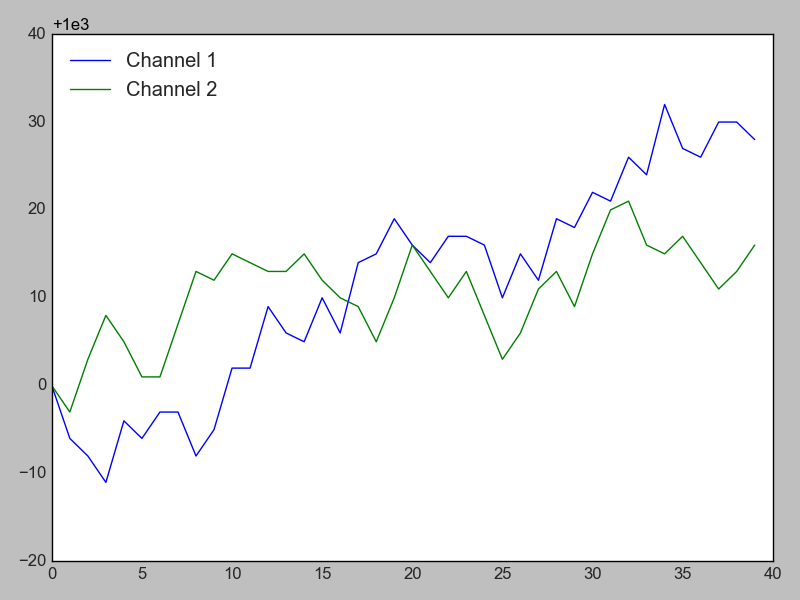

In [31]:
plt.style.use('classic')
plt.figure(figsize=(12,6))


ages = df['Age']
dev_salaries = df['All_Devs']
py_salaries = df['Python']
js_salaries = df['JavaScript']

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

ax1.plot(ages, dev_salaries, color='#444444',
         linestyle='--', label='All Devs')

ax2.plot(ages, py_salaries, label='Python')
ax2.plot(ages, js_salaries, label='JavaScript')

ax1.legend()
ax1.set_title('Median Salary (USD) by Age')
ax1.set_ylabel('Median Salary (USD)')

ax2.legend()
ax2.set_xlabel('Ages')
ax2.set_ylabel('Median Salary (USD)')

plt.tight_layout()

plt.show()

fig1.savefig('fig1.png')
fig2.savefig('fig2.png')

In [32]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [33]:
plt.style.use('seaborn-white')